In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Define dataset paths
train_dir = "dataset/Train"
valid_dir = "dataset/Valid"
test_dir = "dataset/Test"

# Data Preprocessing & Augmentation (Improves model performance)
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    rotation_range=20,      # Randomly rotate images
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True    # Flip images randomly
)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)
valid_data = valid_datagen.flow_from_directory(
    valid_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)

# Get class names (important for labeling)
class_names = list(train_data.class_indices.keys())
print(f"Class Labels: {class_names}")


Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Class Labels: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [3]:
# Load Pretrained MobileNetV2 Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze pretrained layers

# Define Custom Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Show Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
# Train Model
history = model.fit(
    train_data, validation_data=valid_data, epochs=10
)

# Save the trained model
model.save("models/potato_leaf_model.h5")
print("Model Saved Successfully 🎉")


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 369ms/step - accuracy: 0.9872 - loss: 0.0654 - val_accuracy: 0.9367 - val_loss: 0.1311
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 380ms/step - accuracy: 0.9732 - loss: 0.0767 - val_accuracy: 0.9500 - val_loss: 0.1235
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 381ms/step - accuracy: 0.9651 - loss: 0.0841 - val_accuracy: 0.8500 - val_loss: 0.3861
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 384ms/step - accuracy: 0.9755 - loss: 0.0713 - val_accuracy: 0.9333 - val_loss: 0.1770
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 581ms/step - accuracy: 0.9732 - loss: 0.0755 - val_accuracy: 0.9733 - val_loss: 0.0856
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 593ms/step - accuracy: 0.9718 - loss: 0.0720 - val_accuracy: 0.8167 - val_loss: 0.4050
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 587ms/step - accuracy: 0.9793 - loss: 0.0665 - val_accuracy: 0.9167 - val_loss: 0.1639
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 345ms/step - accuracy: 0.9876 - loss: 0.0483 - val_accu

Model Saved Successfully 🎉


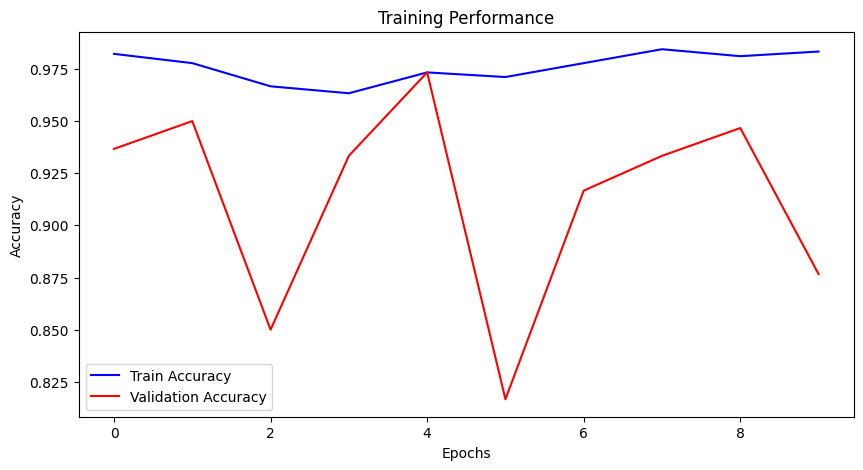

In [6]:
# Plot Training Performance
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Performance')
plt.legend()
plt.show()


In [7]:
# Evaluate on Test Data
loss, acc = model.evaluate(test_data)
print(f"🔍 Model Test Accuracy: {acc * 100:.2f}%")


C:\Users\Sai Arvind Arun\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.8899 - loss: 0.2982
🔍 Model Test Accuracy: 89.67%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


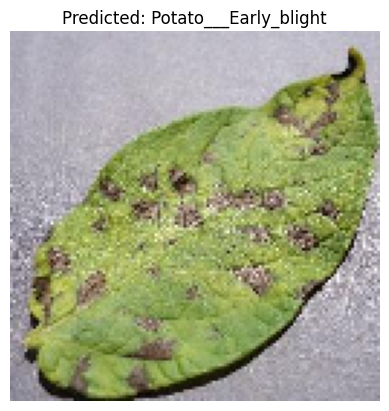

In [8]:
# Sample Prediction
from tensorflow.keras.preprocessing import image

def predict_sample(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

# Test on a single image
predict_sample("dataset/Test/Potato___Early_blight/7227b3db-c212-4370-8b42-443eea1577aa___RS_Early.B 7306.JPG")